In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
 
def parse_if_number(s): 
    try: return float(s) 
    except: return True if s=="true" else False if s=="false" else s if s else None 
 
def parse_ndarray(s): 
    return np.fromstring(s, sep=' ') if s else None 

In [39]:
# vector Name
pdr_vector = 'tbDecoded:vector'
pdr_dist_vector = 'txRxDistanceTB:vector'

csvName = [
#     'test-3d9m.csv', 
#     'test-1bco.csv'
#     'test-g474.csv', 
#     'test-clfv.csv', 
#     'test-sztm.csv', 
#     'test-n_zl.csv', 
#     'test-9m5l.csv'
    'test-vaa6.csv',  # Aircomp simepl
    'test-ffdl.csv', # CAM simepl
    'test-g7ia.csv',  # Aircomp simepl
]

In [40]:

#  opp_scavetool export -f '("tbDecoded:vector" OR "txRxDistanceTB:vector")' -F CSV-R CAM-0-20221109-09\:16\:01-10447.sca CAM-0-20221109-09\:16\:01-10447.vec -o test-sztm.csv

for x in range(len(csvName)): 
    print(csvName[x])


test-vaa6.csv
test-ffdl.csv
test-g7ia.csv


In [41]:
# ReadFile and extract Data
new_df = []
for x in range(len(csvName)): 
    print(csvName[x])
    distances = []
    decoded = []
    df = pd.read_csv(csvName[x], converters = { 
        'attrvalue': parse_if_number, 
        'binedges': parse_ndarray, 
        'binvalues': parse_ndarray, 
        'vectime': parse_ndarray, 
        'vecvalue': parse_ndarray
    })
    distances = df[(df["name"] == pdr_dist_vector) & (df["vectime"].notnull())] 
    decoded = df[(df["name"] == pdr_vector) & (df["vectime"].notnull())] 
    distances = distances[["module", "vecvalue"]] 
    distances.rename(columns={"vecvalue": "distance"}, inplace=True) 
    decoded   = decoded[["module", "vecvalue"]] 
    decoded.rename(columns={"vecvalue": "decode"}, inplace=True) 
    new_df.append(pd.merge(distances, decoded, on='module', how='inner'))

test-vaa6.csv
test-ffdl.csv
test-g7ia.csv


In [42]:
# bs = []
# for i in range(50): 
#     bs.append({"count": 0, "success": 0}) 

# test1 = new_df[0]
# for row in test1.itertuples(): 
#     print(row)
#     for i in range(len(row.distance)): 
#         if row.distance[i] < 500: 
#             # Ensures that we have everything in 10m chunks 
#             remainder = int(row.distance[i] // 10) 
#             if row.decode >= 0: 
#                 # Only count TBs sent i.e. -1 will be ignored in result 
#                 bs[remainder]["count"] += 1 
#                 bs[remainder]["success"] += row.decode[i]


In [43]:
bins = []
tmp = []
for i in range(50): 
    tmp.append({"count": 0, "success": 0}) 
for x in range(len(csvName)): 
    bins.append(tmp)
   

for x in range(len(csvName)): 
    for row in new_df[x].itertuples(): 
        for i in range(len(row.distance)): 
            if row.distance[i] < 500: 
                # Ensures that we have everything in 10m chunks 
                remainder = int(row.distance[i] // 10) 
                if row.decode[i] >= 0: 
                    # Only count TBs sent i.e. -1 will be ignored in result 
                    bins[x][remainder]["count"] += 1 
                    bins[x][remainder]["success"] += row.decode[i]


In [44]:
pdrs = [] 
distances = [] 
for x in range(len(csvName)): 
    p = []
    d = []
    distance = 0
    for dictionary in bins[x]: 
        if dictionary["count"] == 0:
            p.append(0) 
        else: 
            p.append((dictionary["success"] / dictionary["count"] * 100)) 
        d.append(distance) 
        distance += 10
    pdrs.append(p)
    distances.append(d)

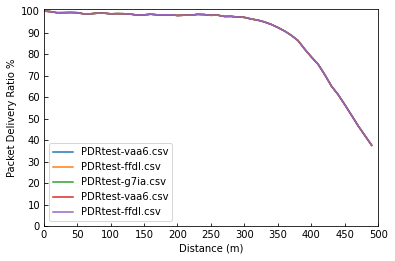

<Figure size 432x288 with 0 Axes>

In [45]:
# Plot
fig, ax = plt.subplots() 

for x in range(len(csvName)): 
    ax.plot(distances[x], pdrs[x], label="PDR"+csvName[x]) 
    
ax.plot(distances[0], pdrs[0], label="PDR"+csvName[0]) 
ax.plot(distances[1], pdrs[1], label="PDR"+csvName[1]) 

ax.set(xlabel='Distance (m)', ylabel="Packet Delivery Ratio %") 
ax.legend(loc="lower left") 
ax.tick_params(direction='in') 
 
# ax.set_xlim([0, (max(distances) + 1)]) 
ax.set_xlim([0, (np.amax(distances) + 1)]) 
ax.set_ylim([0, 101]) 
# plt.xticks(np.arange(0, (max(distances))+50, step=50)) 
plt.xticks(np.arange(0, (np.amax(distances))+50, step=50)) 
plt.yticks(np.arange(0, (101), step=10)) 
 
plt.show() 
plt.savefig("test.png", dpi=300) 
plt.close(fig)